<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenged-Description" data-toc-modified-id="Challenged-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenged Description</a></span></li><li><span><a href="#Notebook-Setup-&amp;-Loading-Data" data-toc-modified-id="Notebook-Setup-&amp;-Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Setup &amp; Loading Data</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Check-for-missing/abnormal-values-in-dataset" data-toc-modified-id="Check-for-missing/abnormal-values-in-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check for missing/abnormal values in dataset</a></span><ul class="toc-item"><li><span><a href="#Looking-for-missing-values" data-toc-modified-id="Looking-for-missing-values-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Looking for missing values</a></span></li><li><span><a href="#Looking-for-abnormal-values" data-toc-modified-id="Looking-for-abnormal-values-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Looking for abnormal values</a></span></li></ul></li><li><span><a href="#Performing-Some-Level-of-Feature-Engineering" data-toc-modified-id="Performing-Some-Level-of-Feature-Engineering-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Performing Some Level of Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Generating-churn-indicator" data-toc-modified-id="Generating-churn-indicator-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Generating churn indicator</a></span></li><li><span><a href="#Generating-headcount-for-each-company:" data-toc-modified-id="Generating-headcount-for-each-company:-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Generating headcount for each company:</a></span></li><li><span><a href="#Quit-Month/Week" data-toc-modified-id="Quit-Month/Week-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Quit Month/Week</a></span></li></ul></li><li><span><a href="#Performing-EDA-to-see-if-there's-additional-correlation-to-churn" data-toc-modified-id="Performing-EDA-to-see-if-there's-additional-correlation-to-churn-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Performing EDA to see if there's additional correlation to churn</a></span><ul class="toc-item"><li><span><a href="#Categorical-Values" data-toc-modified-id="Categorical-Values-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Categorical Values</a></span></li><li><span><a href="#Numerical-Values:" data-toc-modified-id="Numerical-Values:-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Numerical Values:</a></span></li></ul></li><li><span><a href="#Summary-of-EDA-&amp;-Feature-Engineering" data-toc-modified-id="Summary-of-EDA-&amp;-Feature-Engineering-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Summary of EDA &amp; Feature Engineering</a></span></li></ul></li><li><span><a href="#Building-a-model-to-predict-churn" data-toc-modified-id="Building-a-model-to-predict-churn-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building a model to predict churn</a></span><ul class="toc-item"><li><span><a href="#Loading-data-into-h2o-environment" data-toc-modified-id="Loading-data-into-h2o-environment-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loading data into h2o environment</a></span></li><li><span><a href="#Train,-test-split" data-toc-modified-id="Train,-test-split-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train, test split</a></span></li><li><span><a href="#Model-Performance" data-toc-modified-id="Model-Performance-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Model Performance</a></span></li><li><span><a href="#Extract-Variable-Importance" data-toc-modified-id="Extract-Variable-Importance-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Extract Variable Importance</a></span></li><li><span><a href="#Extract-Partial-Dependence-Plot" data-toc-modified-id="Extract-Partial-Dependence-Plot-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Extract Partial Dependence Plot</a></span></li></ul></li></ul></div>

# Challenged Description

We got employee data from a few companies. We have data about all employees who joined
from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the
company as of 2015/12/13 or they have quit. Beside that, we have general info about the
employee, such as avg salary during her tenure, dept, and yrs of experience. <br>
As said above, the goal is to predict employee retention and understand its main drivers.
Specifically, you should: <br>
- Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate
employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13.
That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have
already quit, then company headcount on 2012/03/02 for company 1 would be 1000.
__You should create a table with 3 columns: day, employee_headcount, company_id.__
- What are the main factors that drive employee churn? Do they make sense? Explain your
findings.
- If you could add to this data set just one variable that could help explain employee churn,
what would that be?

# Notebook Setup & Loading Data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(os.path.join(os.getcwd(), 'employee_retention_data.csv'))
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


# Data Exploration

A few things we need to understand before we proceed:
- If there are any missing/abnormal values in the dataset
- Performing some level of feature engineering:
    1. Generating an indicator for churn: i.e., 1 for churn; 0 for still with the company
    2. Calculating headcount as requested, with a table of 3 columns: __day, employee_headcount, company_id__
- Performing some EDA to see if there's any potential correlation for churn

---
## Check for missing/abnormal values in dataset

### Looking for missing values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null object
quit_date      13510 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


So other than `quit_date`, there's no missing values in the dataset, which is good; also, with `quit_date`, if it's null, that means the employees are currently still employed (about 55% of them quit)

### Looking for abnormal values

Additionally, we need to change `join_date` and `quit_date` to date format

In [3]:
for col in ['join_date', 'quit_date']:
    df[col] = pd.to_datetime(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [4]:
col_check =  [col for col in df.columns if col != 'employee_id']


for col in col_check:
    if col in ['join_date', 'quit_date']:
        print('{} min_date: {} ; max_date {}'.format(col, df[col].min(), df[col].max()))
    else:
        print(df.groupby(col)[col].count())

company_id
1     8486
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     865
11      16
12      24
Name: company_id, dtype: int64
dept
customer_service    9180
data_science        3190
design              1380
engineer            4613
marketing           3167
sales               3172
Name: dept, dtype: int64
seniority
1      861
2      942
3      881
4      895
5      936
6      950
7      928
8     1008
9      944
10     927
11     924
12     988
13     894
14     920
15     911
16     936
17     893
18     872
19     910
20     844
21     782
22     764
23     785
24     743
25     715
26     694
27     642
28     585
29     626
98       1
99       1
Name: seniority, dtype: int64
salary
17000.0       2
18000.0       9
19000.0      12
20000.0      21
21000.0      49
22000.0      93
23000.0     111
24000.0     121
25000.0     113
26000.0     106
27000.0      95
28000.0      87
29000.0     104
30000.0     108
31000.0      94
32000.0      80
33

A few things we noticed:
1. `seniority` seems to have 2 abnormal values (98, 99 years of working experience), we can drop them as they are incorrect (or probably replacing it with median)
2. `salary` has some skewed number, we might want to just drop those

In [5]:
# make a copy of dataset so that we can come back if something goes wrong
df_copy = df.copy()

# kick out seniority abnormal values:
df = df[df.seniority < 35]
df.shape

(24700, 7)

---
## Performing Some Level of Feature Engineering
### Generating churn indicator

Going back to the original problem, we want to generate a churn indicator based on whether that employee current has quit or not: <br>
In this case, `churn_ind = 1` means the employee has quit whereas `churn_ind = 0` means the employee is still currently employed at the same company

In [6]:
df['churn_ind'] = df.quit_date.apply(
    lambda x: 0 if pd.isnull(x) else 1) # note here because we've already converted nan to pd.nat format
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn_ind
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


### Generating headcount for each company:

The ideal format from the requirement document would be: 

|`day`| `company_id` | `employee_headcount`|
|-----|-----|-----|
|2011-01-01|1| 1000|
|2011-01-02|1| 1005|

Also, noted that the dates should be starting from `2011/01/24` to `2015/12/13`

In [7]:
# generate date from 2011/01/23 to 2015/12/13
day_range = pd.date_range(start = '2011-01-24', end = '2015-12-13', freq = 'D')
day_range

DatetimeIndex(['2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27',
               '2011-01-28', '2011-01-29', '2011-01-30', '2011-01-31',
               '2011-02-01', '2011-02-02',
               ...
               '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
               '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
               '2015-12-12', '2015-12-13'],
              dtype='datetime64[ns]', length=1785, freq='D')

To achieve that date format, we can do: <br>
1. create multi index based on `day_range` and `company_id`
2. iterate through each row of multi index with each row of original `df` to see if they fit in specific date and count those fit in the dates
3. merge all data together for final dataframe

In [8]:
multi_index = [day_range, sorted(df.company_id.unique())]
multi_index = pd.MultiIndex.from_product(multi_index, names = ['date','company_id'])

headcount_df = pd.DataFrame(index = multi_index).reset_index()
print('headcount_df shape: {}'.format(headcount_df.shape))
headcount_df.head()

headcount_df shape: (21420, 2)


,date,company_id
0,2011-01-24,1
1,2011-01-24,2
2,2011-01-24,3
3,2011-01-24,4
4,2011-01-24,5


Let's write out pseudo code first and optimize after:

```python
for each company:
    for each date:
        total_joined = len(df[df.join_date <= date] & company)
        total_quit = len(df[df.quit_date >= date & company])
        net_headcount = total_joined - total_quit
```

In [9]:
# e.g. date = 2011-01-23, company_id = 1, count people that are between those dates
len(df[(df.join_date <= '2011-01-24') & (df.company_id ==1)])

25

This is relatively slow to go through 2 `for` loops and calculating based on criteria, but very good for readability: <br>

In [10]:
date_list = []
company_list = []
headcount_list = []

for date in day_range:
    for company in sorted(df.company_id.unique()):
        total_join = len(df[(df.join_date <=date) & (df.company_id == company)])
        total_quit = len(df[(df.quit_date <=date) & (df.company_id == company)])
        headcount = total_join - total_quit
        
        date_list.append(date)
        company_list.append(company)
        headcount_list.append(headcount)
        
headcount_df = pd.DataFrame(data = {'date': date_list,
                                    'company':company_list,
                                    'headcount':headcount_list,
                                   })

headcount_df.head()

,date,company,headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


We can now take a look at the distribution of working days for those __who quit__:

Text(0.5, 1.0, 'Histogram of Working Days for people who quit')

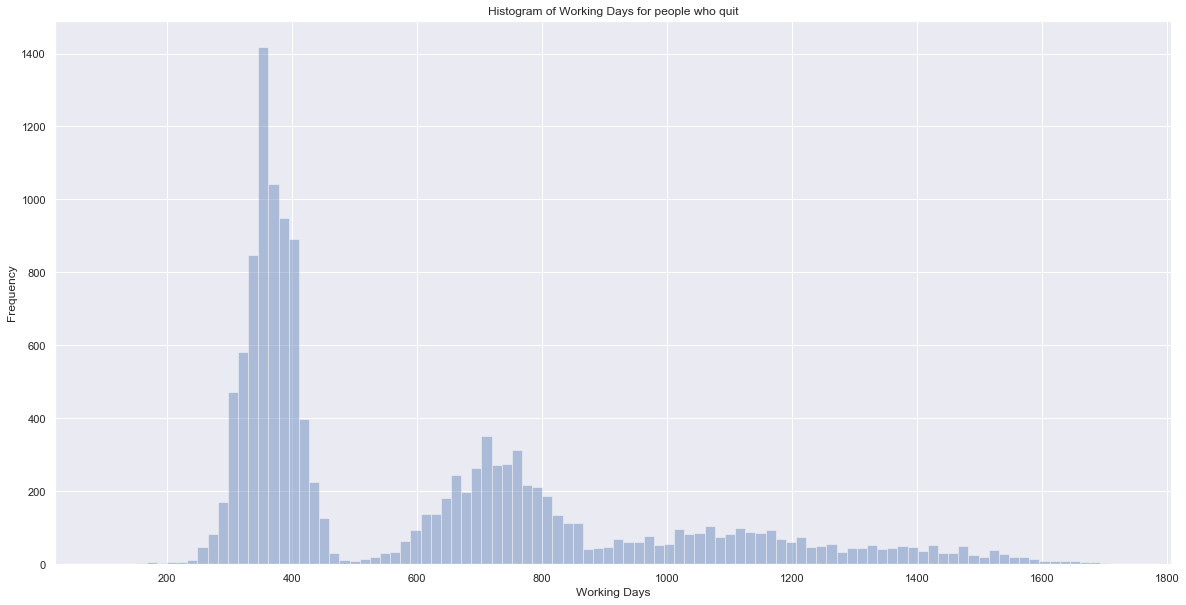

In [11]:
df_quit = df[~df.quit_date.isnull()]
df_stay = df[df.quit_date.isnull()]

sns.set(style = 'darkgrid')
fig, ax = plt.subplots(figsize = (20, 10))
sns.distplot( a = list(map(lambda x: x.days, (df_quit.quit_date - df_quit.join_date))), 
             bins = 100, kde = False)

ax.set_xlabel('Working Days')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Working Days for people who quit')

We can see the vast majority of people leave around 1 year mark, if not they are likely to leave around 2 year mark; then they stabilize afterwards

### Quit Month/Week

__This is suggested by book of the author, as it also makes sense to look at__

Text(0.5, 1.0, 'Frequency of Quit Month')

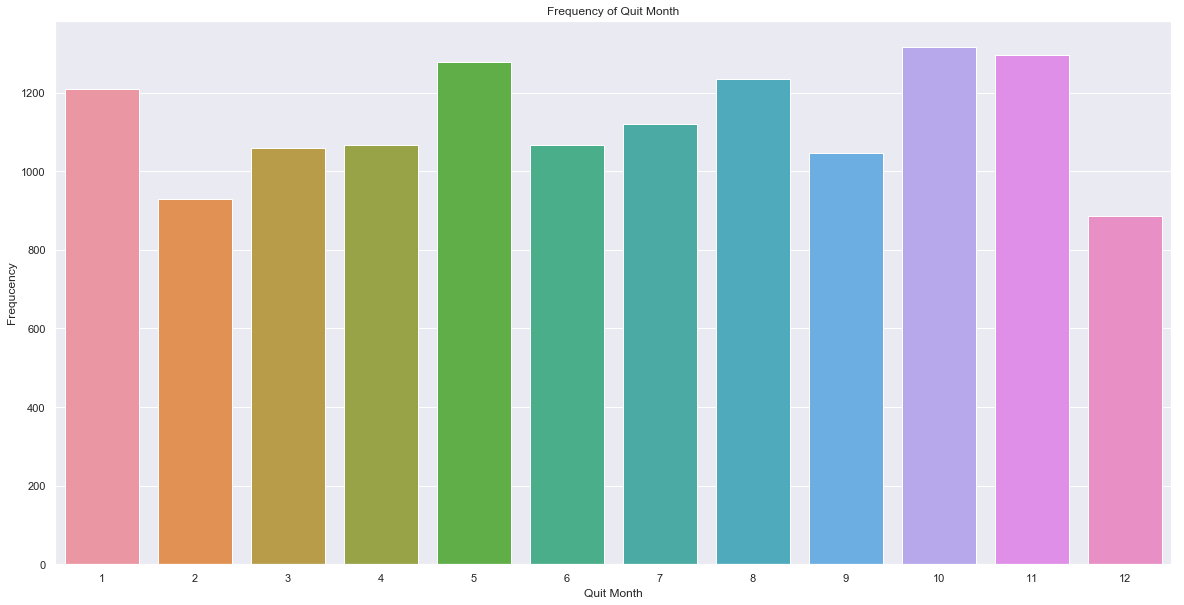

In [12]:
fig, ax = plt.subplots(figsize = (20, 10))
quit_month = df_quit.quit_date.apply(lambda x: x.month)
sns.countplot(quit_month)

ax.set_xlabel('Quit Month')
ax.set_ylabel('Frequcency')
ax.set_title('Frequency of Quit Month')

Text(0.5, 1.0, 'Frequency of Quit Week')

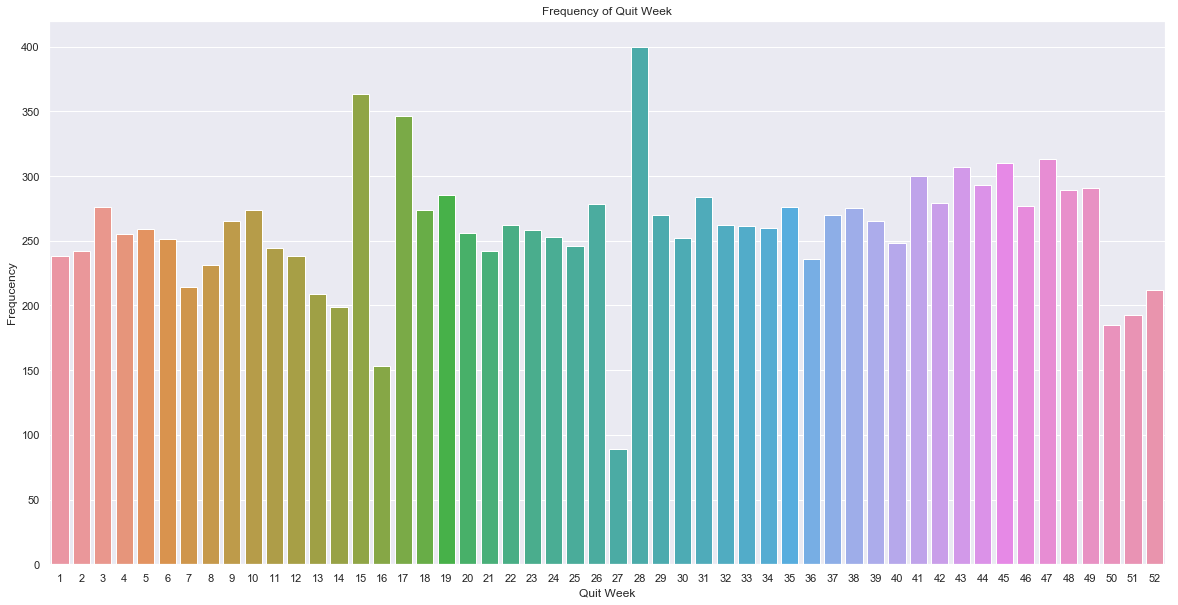

In [13]:
fig, ax = plt.subplots(figsize = (20, 10))
quit_week = df_quit.quit_date.apply(lambda x: x.week)
sns.countplot(quit_week)

ax.set_xlabel('Quit Week')
ax.set_ylabel('Frequcency')
ax.set_title('Frequency of Quit Week')

Here the author of the book thinks that at the beginning of the year most people quit, which is incorrect. <br>
Based on his R code, it looks like he didn't take out people who didn't take, and when it was plotted as histogram, all null values are treated as 0's => that's my guess

## Performing EDA to see if there's additional correlation to churn

In [14]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,churn_ind
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


With the dataset, we can look into:
1. Categorical Values:
    1. if a specific company has higher churn rate than other companies
    2. if a specific department has higher churn rate than other departments
2. Numerical Values:
    1. if seniority affects churn
    2. if salary affects churn

### Categorical Values

plotting for `company_id`:

/Users/yigongzhang/miniconda3/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


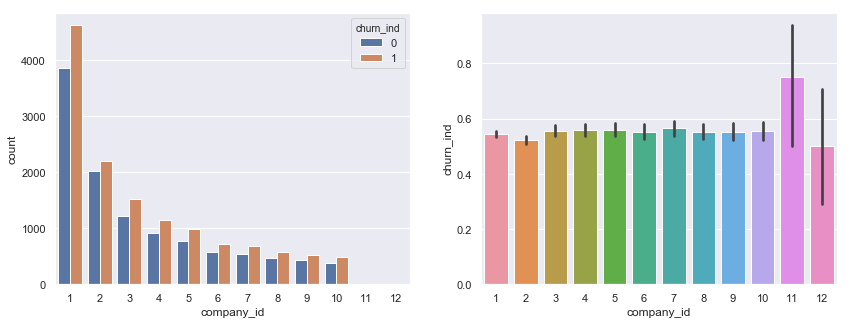

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,5))
sns.countplot(x = 'company_id', hue = 'churn_ind', data = df, ax=ax[0])
sns.barplot(x = 'company_id', y='churn_ind', data= df, ax=ax[1])

Now we can expand this to other categorical values:

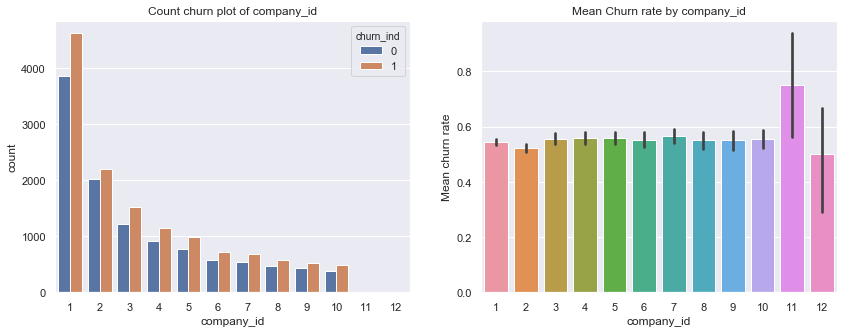

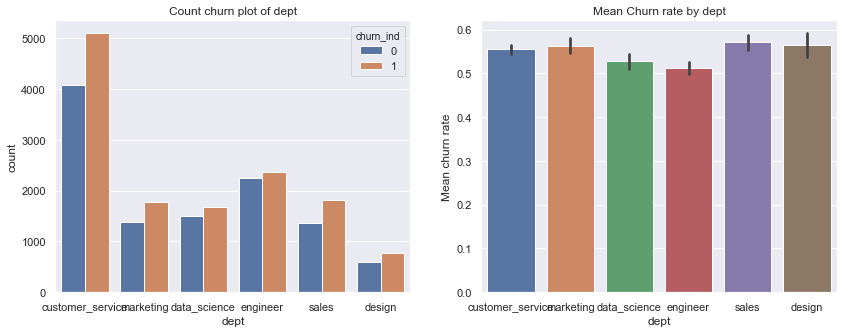

In [16]:
for col in ['company_id', 'dept']:
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))
    sns.countplot(x = col, hue = 'churn_ind', data = df, ax = ax[0])
    sns.barplot(x = col, y = 'churn_ind', data =df, ax=ax[1])
    ax[0].set_title('Count churn plot of {}'.format(col))
    ax[1].set_ylabel('Mean churn rate')
    ax[1].set_title('Mean Churn rate by {}'.format(col))

From this, we can see that:
- looking across `company`, company 11 has a higher churn rate than other companies, while they also had a relative small sample of data
- looking across `dept`, `engineering` and `data_science` seems to have lower churn than other `dept`

### Numerical Values:

Text(0, 0.5, 'Mean Churn Rate')

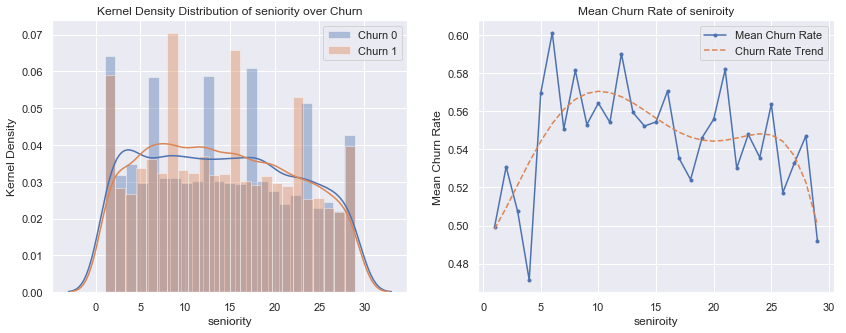

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,5))
grouped_data = df[['seniority','churn_ind']].groupby('seniority').mean().reset_index()
x= np.array(grouped_data.seniority)
y= np.array(grouped_data.churn_ind)
fit = np.polyfit(x,y,5)
fit_func = np.poly1d(fit)

sns.distplot(df[df.churn_ind == 0]['seniority'], label = 'Churn 0', ax=ax[0])
sns.distplot(df[df.churn_ind == 1]['seniority'], label = 'Churn 1', ax=ax[0])
ax[0].legend()
ax[0].set_title('Kernel Density Distribution of {} over Churn'.format('seniority'))
ax[0].set_ylabel('Kernel Density')

plt.plot('seniority',  'churn_ind', '.-', 
         data = grouped_data)

# we can additionally fit a regression line across mean churn rate to observe trend
plt.plot(x, fit_func(x), '--')
ax[1].legend(['Mean Churn Rate','Churn Rate Trend'])
ax[1].set_title('Mean Churn Rate of {}'.format('seniroity'))
ax[1].set_xlabel('seniroity')
ax[1].set_ylabel('Mean Churn Rate')

Expanding this to all numeric values:

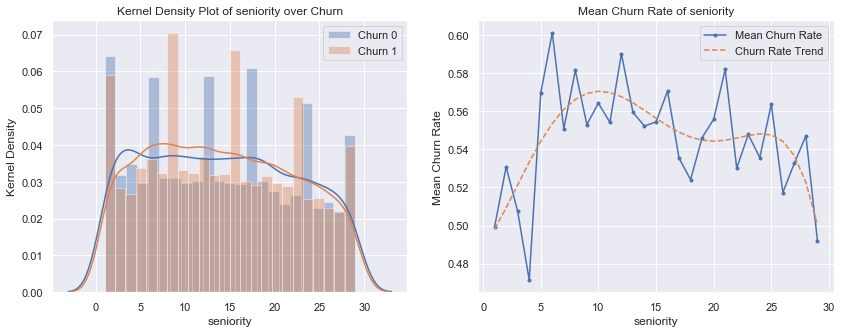

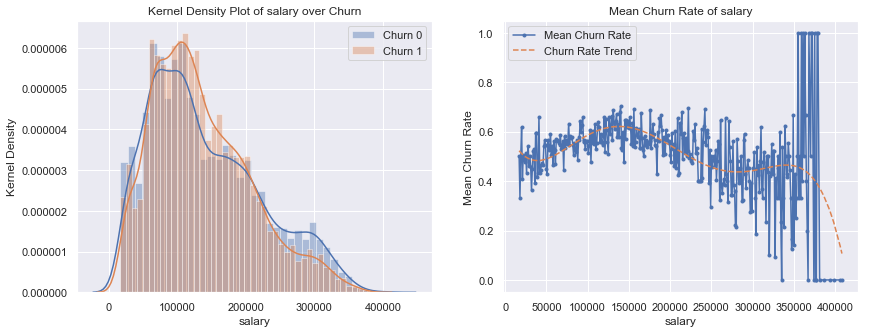

In [18]:
for col in ['seniority','salary']:
    # setting up figure and axes
    fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (14,5))
    
    # setting up 2nd graph's ploynomial regression 
    grouped_data = df[[col,'churn_ind']].groupby(col).mean().reset_index()
    x= np.array(grouped_data[col])
    y= np.array(grouped_data['churn_ind'])
    fit = np.polyfit(x,y,5)
    fit_func = np.poly1d(fit)
    
    # plotting 1st graph
    sns.distplot(df[df.churn_ind == 0][col], label = 'Churn 0', ax= ax[0])
    sns.distplot(df[df.churn_ind == 1][col], label = 'Churn 1', ax= ax[0])
    ax[0].legend()
    ax[0].set_title('Kernel Density Plot of {} over Churn'.format(col))
    ax[0].set_ylabel('Kernel Density')
    
    # plotting 2nd graph
    plt.plot(col, 'churn_ind', '.-',
             data = df[[col, 'churn_ind']].groupby(col).mean().reset_index()
            )
    plt.plot(x, fit_func(x), '--')
    ax[1].legend(['Mean Churn Rate','Churn Rate Trend'])
    ax[1].set_title('Mean Churn Rate of {}'.format(col))
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Mean Churn Rate')

For numeric values:
- Looking at `seniority`, it seems like there is a general downward trend towards seniority -- i.e. the longer the employee stays, the less they tend to churn; also, we can see from the KDE plot that people with `seniority` between 5 - 17 months tend to have higher churn rate than those who do not belong to this group
- Looking at `salary`, it seems like there is a general downward trend as well -- the better the employees are compensated, the less they are likely to churn. __This does have exceptions as you can see from the bottom right graph where some well-compensated employees still churned__; additionally, if we look at the KDE plot of employee salary over Churn, we can see that people in salary range of 100k to 200k generally have a higher churn rate than people are not in this range.

## Summary of EDA & Feature Engineering

Just to quickly summarize what we've found out so far:
- For those people who quit, we can see that vast majority of people tend to leave around 1st year mark, if not, the rest would likely to leave around 2nd year mark, and the churn rate tends to flat out afterwards
- `company 11` has significantly higher churn rate than other companies, but they also have significantly less data points
- Among most departments, `engineering` and `data_science` have the lowest churn rate
- People with 5-17 months of `seniority` have a higher Churn Rate than those who don't, Churn Rate tends to spike around 5-10 months of `seniority` and drops afterwards
- People within salary range of 100k to 200k have higher Churn Rate than those who don't, and generally Churn Rate tends to go down with increase of salaries

---
__As a result, what would be actionable based on these insights__
1. Get more data points on `Company 11` to see if it's true that they have higher churn rate than other companies
2. Based on the findings we get from the dataset, if we were to reduce churn rate, we should target:
    - Focus on `customer_service` and `sales` if you have limited resources, as the churn rate is relatively high in comparison to other departments and they have a high amount of people churning as well
    - Employees who has been with the company for about 0.75 - 2 years with 5-17 months of `seniority` and between salary range of 100k to 200k, as people who left the company usually leave around that time frame; and have indicated a higher churn rate for those numeric characteristics

__Note__: <br>
We got similar results from the sample answer, however we missed one thing -- employees quit at the beginning of the year as well, which kind of make sense

# Building a model to predict churn

We'll be building the model using H2O as it is more integrated and easier to get insights

In [19]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.1" 2018-10-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.1+13-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /Users/yigongzhang/miniconda3/envs/python/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmpuij87115
  JVM stdout: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmpuij87115/h2o_yigongzhang_started_from_python.out
  JVM stderr: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmpuij87115/h2o_yigongzhang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.1
H2O cluster version age:,18 days
H2O cluster name:,H2O_from_python_yigongzhang_o98npf
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


## Loading data into h2o environment

In [20]:
df.columns

Index(['employee_id', 'company_id', 'dept', 'seniority', 'salary', 'join_date',
       'quit_date', 'churn_ind'],
      dtype='object')

In [21]:
h2o_df = H2OFrame(df[['company_id','dept','seniority','salary','churn_ind']])

h2o_df[['company_id', 'dept', 'churn_ind']] = h2o_df[['company_id', 'dept', 'churn_ind']].asfactor()
h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,company_id,dept,seniority,salary,churn_ind
type,enum,enum,int,int,enum
mins,,,1.0,17000.0,
mean,,,14.120971659919004,138176.2753036432,
maxs,,,29.0,408000.0,
sigma,,,8.054137181668152,76056.33195256838,
zeros,,,0,0,
missing,0,0,0,0,0
0,7,customer_service,28.0,89000.0,1
1,7,marketing,20.0,183000.0,1
2,4,marketing,14.0,101000.0,0


## Train, test split

In [22]:
strat_split = h2o_df['churn_ind'].stratified_split(test_frac = 0.25, seed = 123)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['company_id','dept','seniority','salary']
target = 'churn_ind'

model = H2ORandomForestEstimator(balance_classes = True, ntrees = 100, max_depth = 20, seed = 123, 
                                 score_each_iteration = True, nfolds = 5)
model.train(x = feature, y=target,  training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


## Model Performance

In [23]:
model.summary

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1547611457139_1


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.2572237012115018
RMSE: 0.5071722598994367
LogLoss: 0.7309458475923475
Mean Per-Class Error: 0.41985870664957303
AUC: 0.6013473497186853
pr_auc: 0.5655238896493485
Gini: 0.20269469943737062
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2620002131704731: 


,0,1,Error,Rate
0,1653.0,8493.0,0.8371,(8493.0/10146.0)
1,775.0,9356.0,0.0765,(775.0/10131.0)
Total,2428.0,17849.0,0.4571,(9268.0/20277.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2620002,0.6687634,320.0
max f2,0.0,0.8331277,399.0
max f0point5,0.4435209,0.5868098,239.0
max accuracy,0.5193976,0.5801154,201.0
max precision,0.6316516,0.5969240,142.0
max recall,0.0,1.0,399.0
max specificity,0.9982353,0.9997043,0.0
max absolute_mcc,0.4435209,0.1634806,239.0
max min_per_class_accuracy,0.5402425,0.5777317,190.0
max mean_per_class_accuracy,0.5193976,0.5801413,201.0


Gains/Lift Table: Avg response rate: 49.96 %, avg score: 52.70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100113,0.9178502,1.0944057,1.0944057,0.5467980,0.9446817,0.5467980,0.9446817,0.0109565,0.0109565,9.4405651,9.4405651
,2,0.0200227,0.8913425,1.1141247,1.1042652,0.5566502,0.9026092,0.5517241,0.9236455,0.0111539,0.0221104,11.4124671,10.4265161
,3,0.0300833,0.8751651,1.0694186,1.0926115,0.5343137,0.8824910,0.5459016,0.9098823,0.0107591,0.0328694,6.9418558,9.2611543
,4,0.0400454,0.8607983,1.0998235,1.0944057,0.5495050,0.8676164,0.5467980,0.8993679,0.0109565,0.0438259,9.9823500,9.4405651
,5,0.0500074,0.8475411,1.1889984,1.1132496,0.5940594,0.8538655,0.5562130,0.8903033,0.0118448,0.0556707,18.8998379,11.3249567
,6,0.1000148,0.7936463,1.1783865,1.1458180,0.5887574,0.8195163,0.5724852,0.8549098,0.0589280,0.1145988,17.8386510,14.5818038
,7,0.1500222,0.7534361,1.1803604,1.1573321,0.5897436,0.7728641,0.5782380,0.8275612,0.0590267,0.1736255,18.0360356,15.7332144
,8,0.2000296,0.7179983,1.1902296,1.1655565,0.5946746,0.7350393,0.5823471,0.8044307,0.0595203,0.2331458,19.0229590,16.5556506
,9,0.2999951,0.6533905,1.2352502,1.1887801,0.6171682,0.6848001,0.5939504,0.7645670,0.1234824,0.3566282,23.5250240,18.8780112
,10,0.4000099,0.5980335,1.1675304,1.1834670,0.5833333,0.6253986,0.5912958,0.7297706,0.1167703,0.4733985,16.7530352,18.3467017




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.2865144041904915
RMSE: 0.5352704028717555
LogLoss: 0.7910307852912336
Mean Per-Class Error: 0.4926122900793035
AUC: 0.49959525921648706
pr_auc: 0.5414284195922158
Gini: -0.0008094815670258715
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.051947761934597936: 


,0,1,Error,Rate
0,41.0,8353.0,0.9951,(8353.0/8394.0)
1,15.0,10116.0,0.0015,(15.0/10131.0)
Total,56.0,18469.0,0.4517,(8368.0/18525.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0519478,0.7074126,391.0
max f2,0.0155657,0.8578905,397.0
max f0point5,0.0661579,0.6021904,388.0
max accuracy,0.0661579,0.5485560,388.0
max precision,0.2989858,0.5509734,313.0
max recall,0.0155657,1.0,397.0
max specificity,0.9841620,0.9997617,0.0
max absolute_mcc,0.0519478,0.0308648,391.0
max min_per_class_accuracy,0.5815671,0.4990623,177.0
max mean_per_class_accuracy,0.2901794,0.5073877,317.0


Gains/Lift Table: Avg response rate: 54.69 %, avg score: 56.27 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100405,0.9188990,0.9241039,0.9241039,0.5053763,0.9387076,0.5053763,0.9387076,0.0092785,0.0092785,-7.5896084,-7.5896084
,2,0.0200270,0.8959371,0.8697949,0.8970226,0.4756757,0.9059867,0.4905660,0.9223912,0.0086862,0.0179647,-13.0205124,-10.2977411
,3,0.0300135,0.8793662,1.0477075,0.9471605,0.5729730,0.8872317,0.5179856,0.9106925,0.0104629,0.0284276,4.7707465,-5.2839458
,4,0.04,0.8659752,0.9982873,0.9599250,0.5459459,0.8727227,0.5249663,0.9012128,0.0099694,0.0383970,-0.1712699,-4.0075017
,5,0.0500405,0.8531191,0.9929202,0.9665454,0.5430108,0.8593065,0.5285868,0.8928044,0.0099694,0.0483664,-0.7079835,-3.3454625
,6,0.1000270,0.8090976,0.9774625,0.9720010,0.5345572,0.8295508,0.5315704,0.8611947,0.0488599,0.0972263,-2.2537480,-2.7998998
,7,0.1500135,0.7754189,0.9340197,0.9593451,0.5107991,0.7912698,0.5246492,0.8378948,0.0466884,0.1439147,-6.5980259,-4.0654863
,8,0.2,0.7439101,1.0031333,0.9702892,0.5485961,0.7595374,0.5306343,0.8183107,0.0501431,0.1940578,0.3133252,-2.9710789
,9,0.3000270,0.6897579,1.0164071,0.9856646,0.5558554,0.7161971,0.5390428,0.7842667,0.1016681,0.2957260,1.6407139,-1.4335380
,10,0.4,0.6359672,1.0416394,0.9996545,0.5696544,0.6625396,0.5466937,0.7538432,0.1041358,0.3998618,4.1639352,-0.0345474



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.5484853,0.0027320,0.5474254,0.5508772,0.5481482,0.5537838,0.5421918
auc,0.4996555,0.0052402,0.4946552,0.5120488,0.5031385,0.4977334,0.4907016
err,0.4515147,0.0027320,0.4525745,0.4491228,0.4518518,0.4462162,0.4578082
err_count,1672.8,13.426839,1670.0,1664.0,1708.0,1651.0,1671.0
f0point5,0.6021919,0.0027651,0.6015509,0.6046470,0.6018465,0.6073236,0.5955914
f1,0.7075495,0.0023845,0.707223,0.7098012,0.7069321,0.7119176,0.7018733
f2,0.8576,0.0014377,0.8579328,0.8592299,0.8564776,0.8600338,0.8543260
lift_top_group,0.8811834,0.1118717,1.1866701,0.7662082,0.7703673,0.8810573,0.8016142
logloss,0.7910453,0.0044349,0.7909091,0.7802023,0.7936671,0.7909054,0.7995424
max_per_class_error,0.9950081,0.0014499,0.9982068,0.996405,0.9929988,0.9945685,0.9928614


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-01-15 22:04:48,27.418 sec,0.0,nan,nan,nan,nan,nan,nan
,2019-01-15 22:04:48,27.483 sec,1.0,0.6093949,9.6002477,0.5596459,0.3559309,1.1332795,0.5014195
,2019-01-15 22:04:48,27.535 sec,2.0,0.6019655,8.8703131,0.5627663,0.3753210,1.1417635,0.4989709
,2019-01-15 22:04:48,27.582 sec,3.0,0.5890434,7.4969653,0.5636049,0.4002065,1.1496740,0.5005282
,2019-01-15 22:04:48,27.636 sec,4.0,0.5781864,6.3381411,0.5631435,0.4250677,1.1595880,0.4990265
---,---,---,---,---,---,---,---,---,---
,2019-01-15 22:04:51,30.494 sec,96.0,0.5074225,0.7317198,0.6010493,0.5654765,1.0944057,0.4712729
,2019-01-15 22:04:51,30.526 sec,97.0,0.5073216,0.7313710,0.6010858,0.5653078,1.1042652,0.4734921
,2019-01-15 22:04:51,30.558 sec,98.0,0.5073209,0.7314093,0.6011052,0.5652358,1.0944057,0.4576614
,2019-01-15 22:04:51,30.588 sec,99.0,0.5072951,0.7312822,0.6011324,0.5651746,1.0944057,0.4590423



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
salary,108043.7265625,1.0,0.5633264
seniority,46359.9296875,0.4290849,0.2417148
company_id,26372.4140625,0.2440902,0.1375024
dept,11019.9042969,0.1019949,0.0574564


<bound method ModelBase.summary of >

Btw, it predicts horribly

## Extract Variable Importance

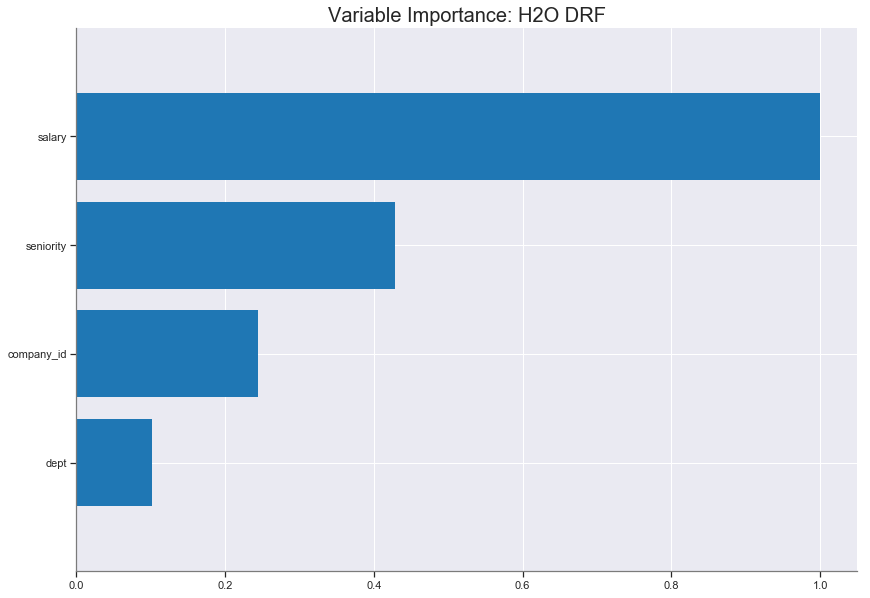

In [24]:
model.varimp_plot()

## Extract Partial Dependence Plot

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model DRF_model_python_1547611457139_1 on column 'company_id'



company_id,mean_response,stddev_response,std_error_mean_response
1,0.5665064,0.1877393,0.0013794
2,0.5480866,0.1970453,0.0014477
3,0.5729110,0.1883045,0.0013835
4,0.5865634,0.1846487,0.0013566
5,0.5840880,0.1818902,0.0013364
6,0.5861368,0.1933488,0.0014206
7,0.5768441,0.1894884,0.0013922
8,0.5765394,0.1834672,0.0013480
9,0.5564524,0.1833512,0.0013471
10,0.5820222,0.1876532,0.0013787


PartialDependence: Partial Dependence Plot of model DRF_model_python_1547611457139_1 on column 'dept'



dept,mean_response,stddev_response,std_error_mean_response
customer_service,0.5855849,0.1556975,0.0011439
data_science,0.6088647,0.1731755,0.0012724
design,0.5865345,0.1654707,0.0012157
engineer,0.5559941,0.1733269,0.0012735
marketing,0.5721752,0.1676018,0.0012314
sales,0.6059340,0.1646786,0.0012099


PartialDependence: Partial Dependence Plot of model DRF_model_python_1547611457139_1 on column 'seniority'



seniority,mean_response,stddev_response,std_error_mean_response
1.0,0.6076317,0.1475431,0.0010840
2.4736842,0.6038271,0.1372049,0.0010081
3.9473684,0.5786849,0.1529489,0.0011237
5.4210526,0.6120024,0.1770080,0.0013005
6.8947368,0.5802907,0.1561360,0.0011472
8.3684211,0.5917923,0.1532588,0.0011260
9.8421053,0.5673352,0.1507820,0.0011078
11.3157895,0.5563307,0.1522495,0.0011186
12.7894737,0.5578800,0.1587577,0.0011664
14.2631579,0.5641973,0.1668608,0.0012260


PartialDependence: Partial Dependence Plot of model DRF_model_python_1547611457139_1 on column 'salary'



salary,mean_response,stddev_response,std_error_mean_response
17000.0,0.5562883,0.0905944,0.0006656
37578.9473684,0.5753138,0.1185983,0.0008714
58157.8947368,0.5189475,0.1521163,0.0011176
78736.8421053,0.6105399,0.1342897,0.0009867
99315.7894737,0.5907515,0.1356310,0.0009965
119894.7368421,0.6315327,0.1246994,0.0009162
140473.6842105,0.6317699,0.1246824,0.0009161
161052.6315789,0.5779067,0.1315365,0.0009664
181631.5789474,0.5861226,0.1287285,0.0009458
202210.5263158,0.6116299,0.1315529,0.0009665


[, , , ]

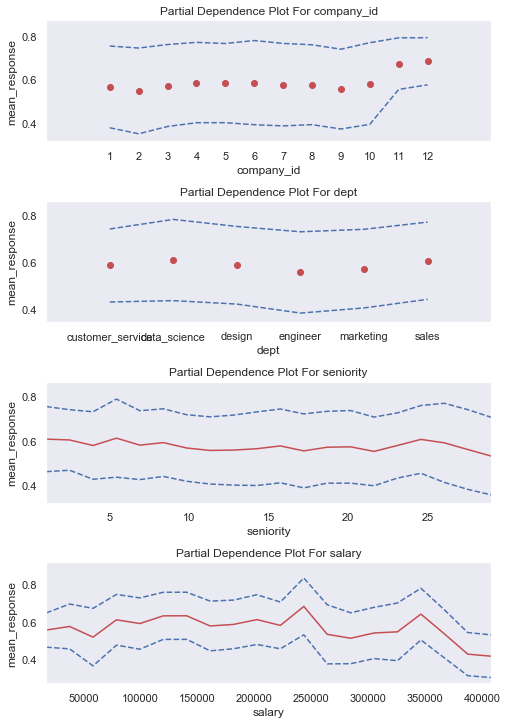

In [25]:
model.partial_plot(train, cols = feature)

Overall it predicts terribly for what we are looking for, but at least it gives us some insights to importance of each factors & how these dependence varies partially. Based on model results and what we have previously analyzed, it seems a more straight forward way of reducing churn would be increase salary specifically for those people in 100k - 200k compensation range. 